# Extracting connected components from a binary image

Connected components in binary images are areas of non-zero values. Each element of each connected component is surrounded by at least one other element from the same component. And different components don't touch each other, there are zeros around each one.

Connected component analysis can be an important part of image processing. Typically (and in OpenCV, it's a fact), finding connected components in an image is much faster than finding all contours. So, it's possible to quickly exclude all irrelevant parts of the image according to connected component features (such as area, centroid location, and so on), to continue working with, remaining areas.

There are two functions in OpenCV that can be used to find connected components: `cv2.connectedComponents` and `cv2.connectedComponentsWithStats`. Both take the same arguments: the binary image whose components are to be found, the connectivity type, and the depth of the output image, with labels for components. Return values will vary. 

`cv2.connectedComponents` is simpler, and returns a tuple of component numbers and an image with labels for components (`labelmap`). In addition to the previous function's outputs, `cv2.connectedComponentsWithStats` also returns statistics about each component and the components' centroid locations.

The labelmap has the same size as the input image, and each of its pixels has a value in the range `[0, components number]`, according to which component the pixel belongs to. Statistics are represented by a Numpy array of the shape (`components number, 5`). The five elements correspond to the (`x0, y0, width, height, area`) structure. The first four elements are parameters of the bounding box for the component elements, and the last parameter is the area of the corresponding connected component. The centroids' locations are also Numpy arrays, but with the shape (`components number, 2`) where each row represents the (`x,  y`) coordinates of the component's center.

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

%matplotlib auto
%pylab inline


def print_image(header,name,np_arr,start_First=0, end_First=1, start_Second=0, end_Second=2):
    print("------  {0:-<25}    Shape{1} {2}: {3:}".format(header, np_arr.shape, name, str(np_arr.dtype)) )
    shapes = np_arr.shape #print(shapes)
    if shapes[0] < end_First:
        end_First = shapes[0]
    if shapes[1] < end_Second:
        end_Second = shapes[1]
    if len(shapes)==3:
        for i in range (start_First,end_First):
            print("[", end=" ")
            for k in range (start_Second,end_Second):
                print(np_arr[i,k], end=" ")
            print(']')
    if len(shapes)==2:
        for i in range (start_First,end_First):
            print("[", end=" ")
            for k in range (start_Second,end_Second):
                print(np_arr[i,k], end=" ")
            print(']')
def plt_view_image(plt,list_images):
    #%pylab inline
    plt.figure(figsize=(15,6))
    n = len(list_images)  #; print(n)
    plot_number = 1
    for name, img in list_images:
        plt.subplot(1,n,plot_number)
        plt.axis('off')
        plt.title(name)
        plt.imshow(img,cmap='gray' )
        plot_number = plot_number + 1
    plt.show()
#help("modules")   
import sys             
print('\n'.join(sys.path))
#pip list"

Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib
D:\HTML_DOC\Program\opencv\Packt\S03\env
C:\Program Files\Python38\python38.zip
C:\Program Files\Python38\DLLs
C:\Program Files\Python38\lib
C:\Program Files\Python38
d:\html_doc\program\opencv\packt\s03\env

d:\html_doc\program\opencv\packt\s03\env\lib\site-packages
d:\html_doc\program\opencv\packt\s03\env\lib\site-packages\pip-20.0.2-py3.8.egg
d:\html_doc\program\opencv\packt\s03\env\lib\site-packages\win32
d:\html_doc\program\opencv\packt\s03\env\lib\site-packages\win32\lib
d:\html_doc\program\opencv\packt\s03\env\lib\site-packages\Pythonwin
d:\html_doc\program\opencv\packt\s03\env\lib\site-packages\IPython\extensions
C:\Users\polit\.ipython


There are two functions in OpenCV that can be used to find connected components: cv2.connectedComponents and cv2.connectedComponentsWithStats. Both take the same arguments: the binary image whose components are to be found, the connectivity type, and the depth of the output image, with labels for components

------  Original-----------------    Shape(480, 640) image: uint8
[ 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ]
[ 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ]
Populating the interactive namespace from numpy and matplotlib


<Figure size 720x432 with 0 Axes>

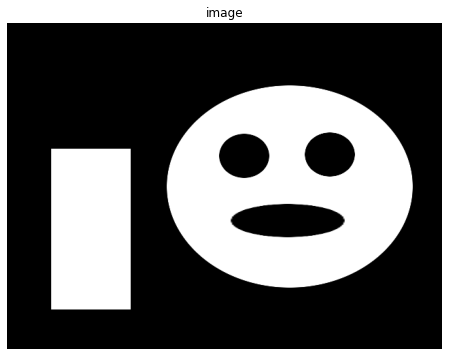

In [2]:
image = cv2.imread('data/BnW.png', cv2.IMREAD_GRAYSCALE)


######################################################
print_image('Original','image',image,0,2,0,15)
%pylab inline
plt.figure(figsize=(10,6))
plt_view_image(plt,[["image",image]   ])

cv2.connectedComponents is simpler, and returns a tuple of component numbers and an image with labels for components (labelmap)

In [3]:
connectivity = 8
num_labels, labelmap = cv2.connectedComponents(image, connectivity, cv2.CV_32S)

print(num_labels)
print_image('labelmap','labelmap',labelmap,240,241,0,640)

3
------  labelmap-----------------    Shape(480, 640) labelmap: int32
[ 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1

In [4]:
a = np.array((1,2,3))
print(a)
b = np.array((2,3,4))
print(b)
print(np.hstack((a,b)))
a = np.array([[1],[2],[3]])
print(a)
b = np.array([[2],[3],[4]])
print(b)
print(np.hstack((a,b)))

[1 2 3]
[2 3 4]
[1 2 3 2 3 4]
[[1]
 [2]
 [3]]
[[2]
 [3]
 [4]]
[[1 2]
 [2 3]
 [3 4]]


<Figure size 720x432 with 0 Axes>

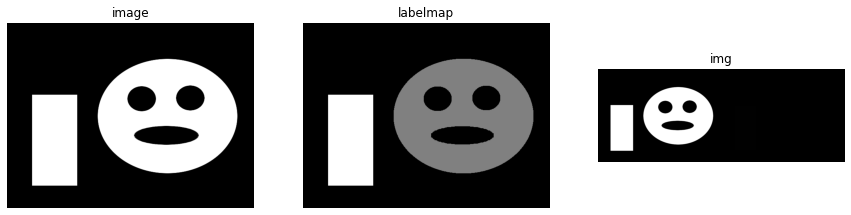

In [5]:
img = np.hstack((image, labelmap.astype(np.float32)/(num_labels - 1)))



###################################
plt.figure(figsize=(10,6))
plt_view_image(plt,[["image",image],["labelmap",labelmap] , ["img",img]   ])

cv2.imshow('Connected components', img)
cv2.waitKey()
cv2.destroyAllWindows()

cv2.connectedComponentsWithStats also returns statistics about each component and the components' centroid locations.

------  Lena---------------------    Shape(512, 512) img_Lena: uint8
[ 169 169 168 167 169 164 170 167 170 167 169 167 163 169 166 162 164 163 167 167 162 164 163 164 161 164 163 161 163 162 161 164 162 165 164 166 166 173 167 173 173 173 173 177 177 181 179 176 178 178 174 180 175 173 170 168 159 157 161 150 140 133 128 117 110 110 106 103 101 106 112 107 112 110 114 115 116 116 116 122 120 119 118 117 116 119 118 120 118 119 118 119 122 120 118 120 119 120 120 118 115 116 118 119 119 122 126 123 125 128 132 130 125 134 132 132 134 133 132 136 136 140 140 134 135 139 142 142 142 141 145 140 139 141 141 139 143 145 142 144 143 142 139 141 144 138 140 137 142 140 140 140 139 141 139 139 144 144 144 144 140 145 142 144 143 144 144 145 144 145 144 146 145 144 144 144 146 144 143 144 143 143 141 144 144 144 145 145 142 142 143 142 144 145 143 144 146 146 144 146 145 144 143 145 145 146 142 141 147 142 143 147 143 142 140 142 141 137 142 142 143 143 140 143 141 139 144 142 143 144 140 144 1

<Figure size 720x432 with 0 Axes>

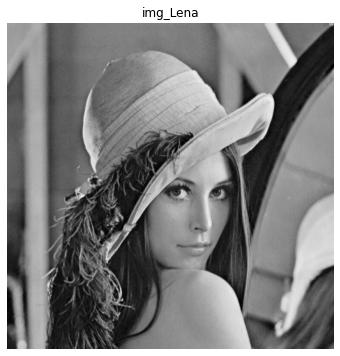

In [6]:
img_Lena = cv2.imread('data/Lena.png', cv2.IMREAD_GRAYSCALE)



#################################################
print_image('Lena','img_Lena',img_Lena,0,1,0,512)
plt.figure(figsize=(10,6))
plt_view_image(plt,[["img_Lena",img_Lena]   ])

Estimated threshold (Otsu) == 124.0
------  Original-----------------    Shape(512, 512) img_Lena: uint8
[ 114 116 114 124 119 123 123 123 127 120 130 124 123 125 119 122 117 123 120 120 120 114 111 106 99 ]
[ 115 120 120 123 122 124 124 123 128 122 123 125 125 130 124 122 116 119 114 115 115 112 107 105 105 ]
[ 118 122 120 128 123 125 126 123 125 120 123 125 120 124 128 124 120 117 115 116 114 112 105 103 106 ]
[ 120 120 124 124 127 128 131 130 126 123 126 127 124 124 128 122 118 116 112 117 115 114 112 110 109 ]
[ 128 125 125 122 122 132 129 125 129 123 125 124 129 122 124 123 119 114 118 115 115 112 114 112 109 ]
[ 127 126 125 124 129 129 126 124 128 127 128 123 128 125 124 124 124 120 120 118 115 114 112 111 111 ]
[ 124 126 127 129 132 125 125 126 126 125 124 125 125 127 126 122 122 124 124 118 117 116 117 114 111 ]
[ 128 126 129 130 127 126 126 128 127 127 124 127 125 125 124 126 120 126 119 119 120 117 118 115 119 ]
[ 124 129 126 127 129 130 127 130 128 132 125 126 127 126 126 12

<Figure size 720x432 with 0 Axes>

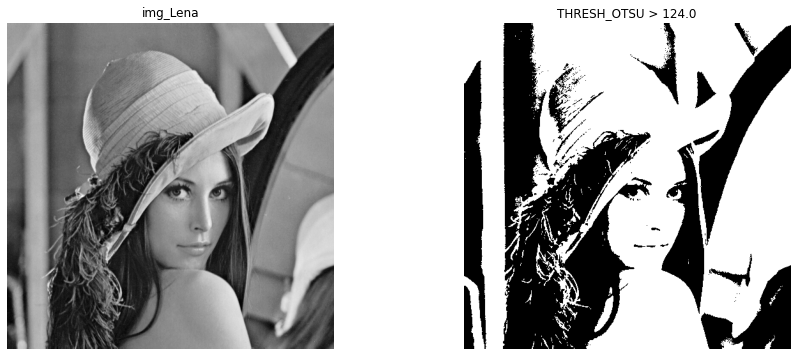

<Figure size 720x432 with 0 Axes>

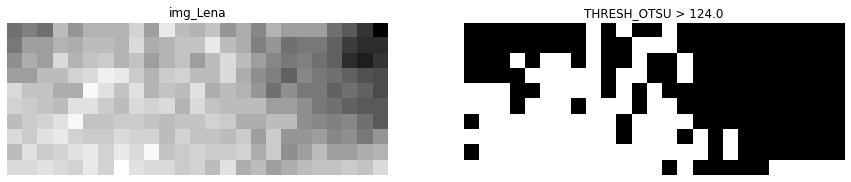

In [11]:
otsu_thr, THRESH_OTSUbinary = cv2.threshold(img_Lena, -1, 1, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
print('Estimated threshold (Otsu) ==', otsu_thr)


##########################################################
print_image('Original','img_Lena',img_Lena,495,505,405,430)
print_image('threshold THRESH_OTSU > {0}'.format(otsu_thr),'image',THRESH_OTSUbinary,495,505,405,430)
plt.figure(figsize=(10,6))
plt_view_image(plt,[["img_Lena",img_Lena],
                    ["THRESH_OTSU > {0}".format(otsu_thr),THRESH_OTSUbinary]
                   ])
plt.figure(figsize=(10,6))
plt_view_image(plt,[["img_Lena",img_Lena[495:505,405:430]],
                    ["THRESH_OTSU > {0}".format(otsu_thr),THRESH_OTSUbinary[495:505,405:430]]
                   ])

cv2.imshow('image, threshold THRESH_OTSU binary > {0}'.format(otsu_thr), 
           np.hstack([img_Lena,
                      np.where(THRESH_OTSUbinary > 0, np.uint8(255), np.uint8(0))   ]))
cv2.waitKey()
cv2.destroyAllWindows()

In [8]:
#connectivity = 8
output = cv2.connectedComponentsWithStats(THRESH_OTSUbinary, connectivity, cv2.CV_32S)


##########################################################
print("len(output) ==",len(output))
for item in output:
    if isinstance(item, np.ndarray):
        print(item.shape)
    else:
        print(item)

len(output) == 4
246
(512, 512)
(246, 5)
(246, 2)


In [9]:
# The first cell is the number of labels
num_labels = output[0]

# The second cell is the label matrix
labelmap = output[1]

# The third cell is the stat matrix
stats = output[2]

# The fourth cell is the centroid matrix
centroids = output[3]


###################################################################
print_image('labelmap','labelmap',labelmap,0,1,0,512)
#stats == statistics output for each label, including the background label, see below for available statistics. 
# Statistics are accessed via stats(label, COLUMN) where COLUMN is one of ConnectedComponentsTypes. The data type is CV_32S.
# cv.CC_STAT_LEFT == The leftmost (x) coordinate which is the inclusive start of the bounding box in the horizontal direction.
# cv.CC_STAT_TOP == The topmost (y) coordinate which is the inclusive start of the bounding box in the vertical direction.
# cv.CC_STAT_WIDTH == The horizontal size of the bounding box.
# cv.CC_STAT_HEIGHT == The vertical size of the bounding box.
# cv.CC_STAT_AREA == The total area (in pixels) of the connected component.
print_image('stats','stats',stats,0,3,0,512)
print_image('centroids','centroids',centroids,0,2,0,512)

------  labelmap-----------------    Shape(512, 512) labelmap: int32
[ 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0 0 0 0 0 0 0 0 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0 0 0 0 0 0 0 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3

<Figure size 1152x432 with 0 Axes>

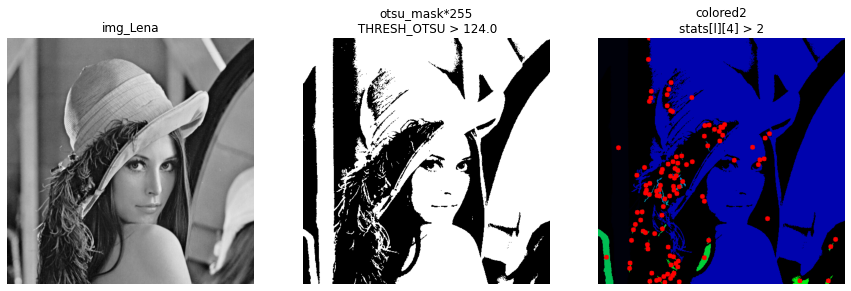

<Figure size 1152x432 with 0 Axes>

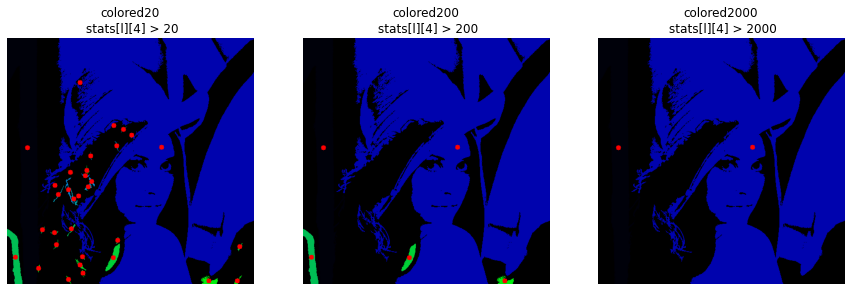

In [10]:
colored2   = np.copy(np.full((img_Lena.shape[0], img_Lena.shape[1], 3), 0, np.uint8))
colored20  = np.copy(np.full((img_Lena.shape[0], img_Lena.shape[1], 3), 0, np.uint8))
colored200 = np.copy(np.full((img_Lena.shape[0], img_Lena.shape[1], 3), 0, np.uint8))
colored2000= np.copy(np.full((img_Lena.shape[0], img_Lena.shape[1], 3), 0, np.uint8))

for l in range(1, num_labels):
    if stats[l][4] > 2:
        colored2[labelmap == l] = (0, 255*l/num_labels, 255*num_labels/l)
        cv2.circle(colored2, (int(centroids[l][0]), int(centroids[l][1])),5,(255,0,0),cv2.FILLED)
    if stats[l][4] > 20:
        colored20[labelmap == l] = (0, 255*l/num_labels, 255*num_labels/l)
        cv2.circle(colored20,(int(centroids[l][0]), int(centroids[l][1])),5,(255,0,0),cv2.FILLED)
    if stats[l][4] > 200:
        colored200[labelmap == l] = (0, 255*l/num_labels, 255*num_labels/l)
        cv2.circle(colored200,(int(centroids[l][0]), int(centroids[l][1])),5,(255,0,0),cv2.FILLED)
    if stats[l][4] > 2000:
        colored2000[labelmap == l] = (0, 255*l/num_labels, 255*num_labels/l)
        cv2.circle(colored2000,(int(centroids[l][0]), int(centroids[l][1])),5,(255,0,0),cv2.FILLED)
        
otsu_mask255 = cv2.cvtColor(THRESH_OTSUbinary*255, cv2.COLOR_GRAY2BGR)



####################################################################
plt.figure(figsize=(16,6))
plt_view_image(plt,[["img_Lena",img_Lena],
                    ["otsu_mask*255\n THRESH_OTSU > {0}".format(otsu_thr),otsu_mask255],
                    ["colored2\nstats[l][4] > 2",colored2],
                   ])
plt.figure(figsize=(16,6))
plt_view_image(plt,[["colored20\n stats[l][4] > 20",    colored20],
                    ["colored200\n stats[l][4] > 200",  colored200],
                    ["colored2000\n stats[l][4] > 2000",colored2000],
                   ])

cv2.imshow('Connected components (img_Lena)-> otsu_mask255(124), ->  stats[l][4] > 2, stats[l][4] > 20',
           np.hstack((otsu_mask255, colored2, colored20 )))
cv2.imshow('Connected components: stats[l][4] > 20 , stats[l][4] > 200  stats[l][4] > 2000', 
           np.hstack((colored20, colored200,colored2000)))
cv2.waitKey()
cv2.destroyAllWindows()